# Chapter 1: The Machine Learning Landscape

## Setup

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3,7)

Scikit-Learn ≥1.0.1 is required:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Life Satifsfaction linear model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing, pipeline

Make this notebook's output stable across runs:

In [4]:
np.random.seed(99)

Let's define the default font sizes, to plot pretty figures:

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:
# Download and prepare the data
# data_root = "https://github.com/ageron/data/raw/main/"
# lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat = pd.read_csv("data/lifesat_ageron.csv")

lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [7]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


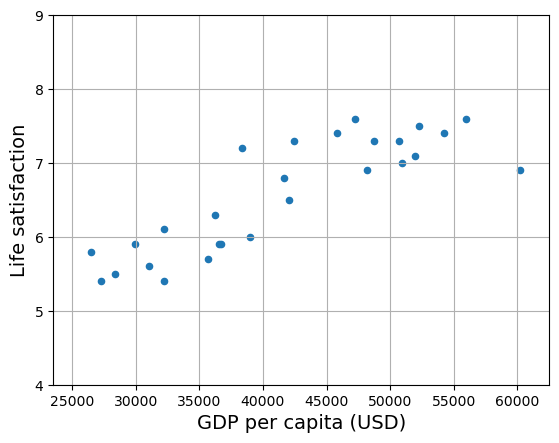

In [8]:
# Visualize the data
lifesat.plot(
    kind = 'scatter',
    x = 'GDP per capita (USD)',
    y = 'Life satisfaction',
    grid = True
)
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [9]:
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

In [10]:
# Select a linear model (model based learning)
lr_model = LinearRegression()

# Train the model
lr_model.fit(X, y)

LinearRegression()

In [11]:
# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(lr_model.predict(X_new))  # output: [[6.30165767]]

[[6.30165767]]


In [12]:
# Instance-based learning model
knn_model = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [13]:
# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(knn_model.predict(X_new))

[[6.33333333]]


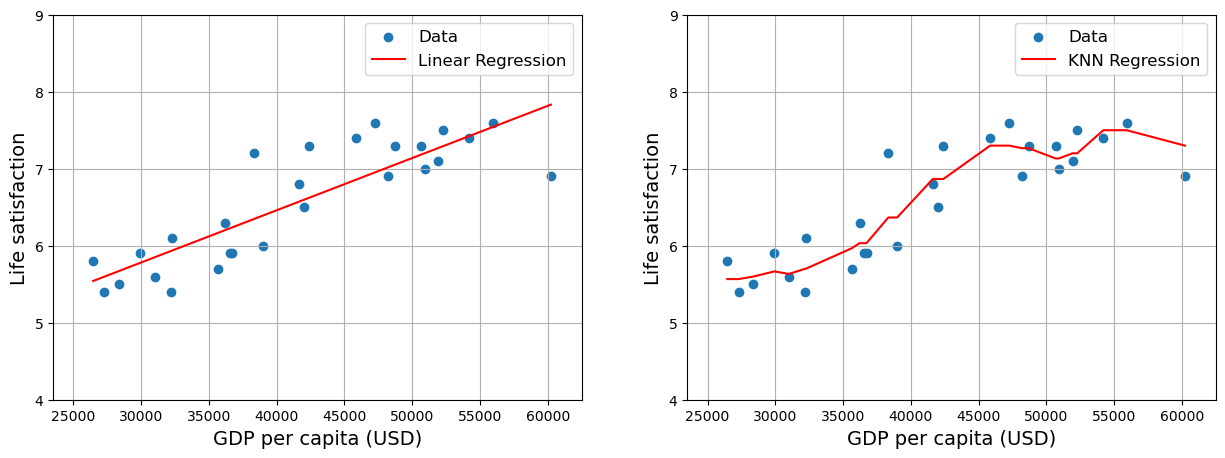

In [14]:
# Train the model
knn_model.fit(X, y)

y_pred_lr = lr_model.predict(X)
y_pred_knn = knn_model.predict(X)

figure, axis = plt.subplots(1, 2, figsize=(15, 5))

axis[0].scatter(data=lifesat, x="GDP per capita (USD)", y="Life satisfaction", label="Data")
axis[0].axis([23_500, 62_500, 4, 9])
axis[0].plot(X, y_pred_lr, color="red", label="Linear Regression")

axis[1].scatter(data=lifesat, x="GDP per capita (USD)", y="Life satisfaction", label="Data")
axis[1].axis([23_500, 62_500, 4, 9])
axis[1].plot(X, y_pred_knn, color="red", label="KNN Regression")

# Set the same parameters for both subplots
for ax in axis:
    ax.set_xlabel("GDP per capita (USD)")
    ax.set_ylabel("Life satisfaction")
    ax.legend()
    ax.grid()

plt.show()

## Generating the data and figures

In [15]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Load and prepare *Life satisfaction* data

To create `lifesat.csv`, I downloaded the Better Life Index (BLI) data from [OECD's website](http://stats.oecd.org/index.aspx?DataSetCode=BLI) (to get the Life Satisfaction for each country), and World Bank GDP per capita data from [OurWorldInData.org](https://ourworldindata.org/grapher/gdp-per-capita-worldbank). The BLI data is in `data/oecd-df-bli-all.csv` (data from 2020), and the GDP per capita data is in `data/gdp-per-capita-worldbank.csv` (data up to 2022).

If you want to grab the latest versions, please feel free to do so. However, there may be some changes (e.g., in the column names, or different countries missing data), so be prepared to have to tweak the code.

In [16]:
# import urllib.request

datapath = Path() / "data"
datapath.mkdir(parents=True, exist_ok=True)

# data_root = "https://github.com/ageron/data/raw/main/"
# for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
#     if not (datapath / filename).is_file():
#         print("Downloading", filename)
#         url = data_root + "lifesat/" + filename
#         urllib.request.urlretrieve(url, datapath / filename)

In [17]:
oecd_bli = pd.read_csv(datapath / "oecd-df-bli-all.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp-per-capita-worldbank.csv")

Preprocess the GDP per capita data to keep only the year 2020:

In [18]:
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"]==2020]
gdp_per_capita = gdp_per_capita.drop(columns=["Code", "Year"])
gdp_per_capita.columns = ["Country", "GDP per capita (USD)"]
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1968.3410
Albania,13278.4350
Algeria,10844.7705
Angola,6029.6920
Antigua and Barbuda,19062.4120


Preprocess the OECD BLI data to keep only the `Life satisfaction` column:

In [19]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="OBS_VALUE")
oecd_bli = oecd_bli.rename(
    {"Slovak Republic": "Slovakia", "Korea": "South Korea", "Türkiye": "Turkey"},
    axis=0
)
oecd_bli = oecd_bli.drop(index=["OECD - Total"])
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0


Now let's merge the life satisfaction data and the GDP per capita data, keeping only the `GDP per capita` and `Life satisfaction` columns:

In [20]:
full_country_stats = pd.merge(
    left=gdp_per_capita,
    right=oecd_bli[["Life satisfaction"]],
    left_index=True,
    right_index=True,
    how="outer"
)

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Afghanistan,1968.3410,NaN
Albania,13278.4350,NaN
Algeria,10844.7705,NaN
Angola,6029.6920,NaN
Antigua and Barbuda,19062.4120,NaN


In [21]:
full_country_stats = full_country_stats[full_country_stats['Life satisfaction'].notna()]
full_country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Australia to United States
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GDP per capita (USD)  41 non-null     float64
 1   Life satisfaction     41 non-null     float64
dtypes: float64(2)
memory usage: 984.0+ bytes


In [22]:
full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Australia,48651.734,7.1
Austria,51854.750,7.2
Belgium,49030.992,6.8
Brazil,14109.764,6.1
Canada,46193.176,7.0


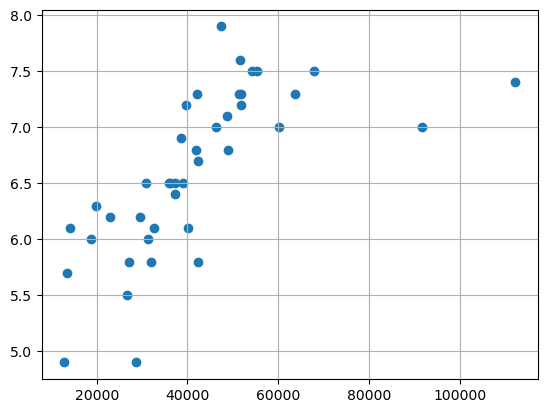

In [23]:
plt.scatter(data=full_country_stats, x="GDP per capita (USD)", y="Life satisfaction")
plt.grid()
plt.show()

To illustrate the risk of overfitting, I use only part of the data in most figures (all countries with a GDP per capita between `min_gdp` and `max_gdp`). Later in the chapter I reveal the missing countries, and show that they don't follow the same linear trend at all.

In [24]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[
    (full_country_stats["GDP per capita (USD)"] >= min_gdp) &
    (full_country_stats["GDP per capita (USD)"] <= max_gdp)
]

country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Australia,48651.734,7.1
Austria,51854.750,7.2
Belgium,49030.992,6.8
Canada,46193.176,7.0
Czechia,38639.980,6.9


In [25]:
country_stats.to_csv("data/lifesat.csv")
full_country_stats.to_csv("data/lifesat_full.csv")

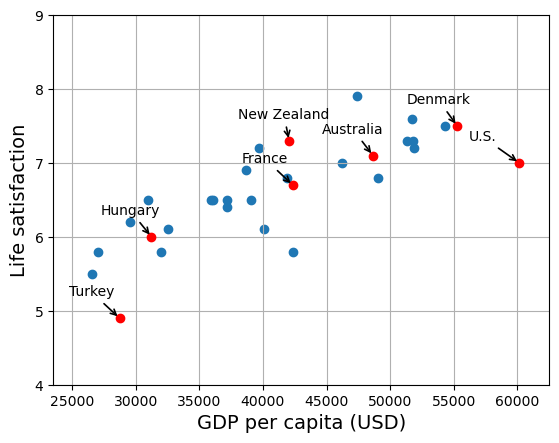

In [26]:
gdp_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"
countries = [
    "Australia",
    "New Zealand",
    "United States",
    "Denmark",
    "Hungary",
    "Turkey",
    "France"
]

plt.scatter(
    data = country_stats.loc[~country_stats.index.isin(countries)],
    x = gdp_col,
    y = lifesat_col
)

for country in countries:
    gdp = country_stats.loc[country, gdp_col]
    lifesat = country_stats.loc[country, lifesat_col]
    # Add country's coordinate as red point
    # plt.scatter(gdp, lifesat, color="red")
    plt.plot(gdp, lifesat, "ro")
    # Annotate the point
    plt.annotate(
        text = "U.S." if country == "United States" else country,
        xy = (gdp, lifesat),
        xytext = (gdp - 4000, lifesat + 0.3),  # Position of the label
        arrowprops = dict(facecolor="black", arrowstyle="->", lw=1.2),
        # arrowprops = dict(facecolor="black", width=0.5, headwidth=5),
        fontsize = 10
    )

plt.axis([min_gdp, max_gdp, 4, 9])
plt.xlabel(gdp_col)
plt.ylabel(lifesat_col)
plt.grid()
plt.show()

In [27]:
# Highlighted countries
country_stats.loc[countries].sort_values(gdp_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28726.191,4.9
Hungary,31232.102,6.0
New Zealand,42052.140,7.3
France,42344.945,6.7
Australia,48651.734,7.1
Denmark,55275.062,7.5
United States,60158.910,7.0


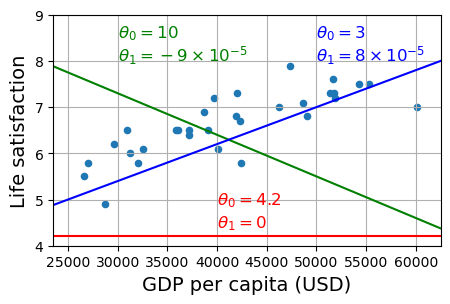

In [28]:
country_stats.plot(kind="scatter", figsize=(5, 3), grid=True, x=gdp_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9 * 1e-5
plt.plot(X, w1 + w2 * X, "g")
plt.text(30_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(30_000, 8, fr"$\theta_1 = -9 \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8 * 1e-5
plt.plot(X, w1 + w2 * X, "b")
plt.text(50_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(50_000, 8, fr"$\theta_1 = 8 \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, 4, 9])
plt.show()

In [29]:
X_sample = country_stats[[gdp_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0 = {t0:.2f} \nθ1 = {t1:.2e}")

θ0 = 4.17 
θ1 = 6.02e-05


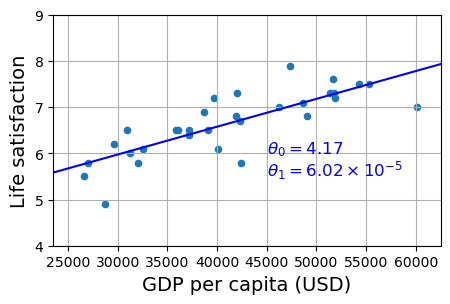

In [30]:
country_stats.plot(kind="scatter", x=gdp_col, y=lifesat_col, grid=True, figsize=(5, 3))

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t1 * X + t0, "b")
plt.text(45_000, 6, fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(45_000, 5.5, fr"$\theta_1 = {t1*1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, 4, 9])
plt.show()

In [31]:
cyprus_gdp_per_capita = gdp_per_capita[gdp_col].loc["Cyprus"]
cyprus_gdp_per_capita

np.float64(39871.87)

In [32]:
cyprus_pred_lifesat = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_pred_lifesat

np.float64(6.56876373712658)

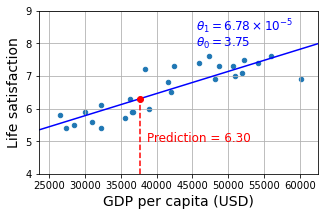

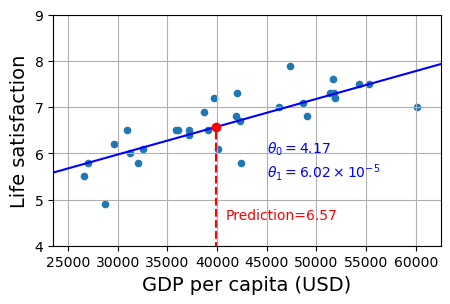

In [33]:
country_stats.plot(kind="scatter", x=gdp_col, y=lifesat_col, grid=True, figsize=(5, 3))

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t1 * X + t0, "b")
plt.text(45_000, 6, fr"$\theta_0 = {t0:.2f}$", color="b", fontsize=10)
plt.text(45_000, 5.5, fr"$\theta_1 = {t1*1e5:.2f} \times 10^{{-5}}$", color="b", fontsize=10)

plt.scatter(cyprus_gdp_per_capita, cyprus_pred_lifesat, color="red", zorder=5)
plt.plot(
    [cyprus_gdp_per_capita, cyprus_gdp_per_capita],  # x-coordinates: x1, x2
    [0, cyprus_pred_lifesat],  # y-coordinates: y1, y2
    "r--"
)
plt.text(
    cyprus_gdp_per_capita+1000,
    cyprus_pred_lifesat-2,
    f"Prediction={cyprus_pred_lifesat:.2f}",
    color="red",
    fontsize=10
)

plt.axis([min_gdp, max_gdp, 4, 9])
plt.show()

In [34]:
missing_data = full_country_stats[
    (full_country_stats["GDP per capita (USD)"] < min_gdp) |
    (full_country_stats["GDP per capita (USD)"] > max_gdp)
]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
Brazil,14109.764,6.1
Chile,22970.550,6.2
Colombia,13358.298,5.7
Costa Rica,19778.387,6.3
Ireland,91791.440,7.0
Luxembourg,112274.820,7.4
Mexico,18639.662,6.0
Norway,63776.160,7.3
South Africa,12866.569,4.9


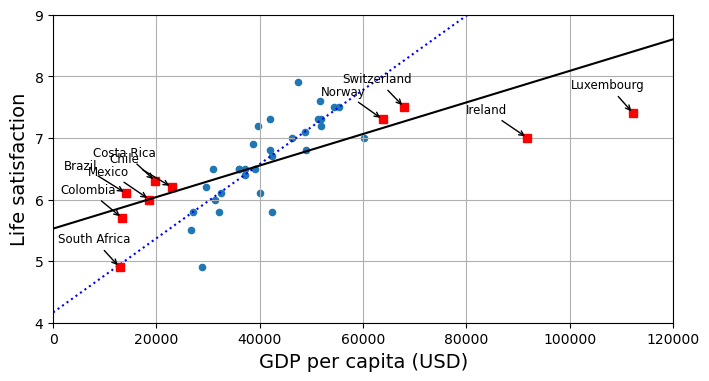

In [35]:
country_stats.plot(kind="scatter", x=gdp_col, y=lifesat_col, figsize=(8, 4), grid=True)

X = np.linspace(0, 120_000, 1000).reshape(-1, 1)
plt.plot(X, lin1.predict(X), "b:")

# Annotate outliers (missing data)
for c in missing_data.index:
    c_gdp = missing_data.loc[c][gdp_col]
    c_lifesat = missing_data.loc[c][lifesat_col]
    plt.plot(c_gdp, c_lifesat, "rs")
    plt.annotate(
        text = c,
        xy = (c_gdp, c_lifesat),
        xytext = (c_gdp - 12_000, c_lifesat + 0.4),
        arrowprops = dict(arrowstyle="->"),
        fontsize=8.5
    )

# Train a linear model with full data
X_full = full_country_stats[[gdp_col]].values
y_full = full_country_stats[[lifesat_col]].values
lin2 = LinearRegression()
lin2.fit(X_full, y_full)
plt.plot(X, lin2.predict(X), "black")

plt.axis([0, 120_000, 4, 9])
plt.show()

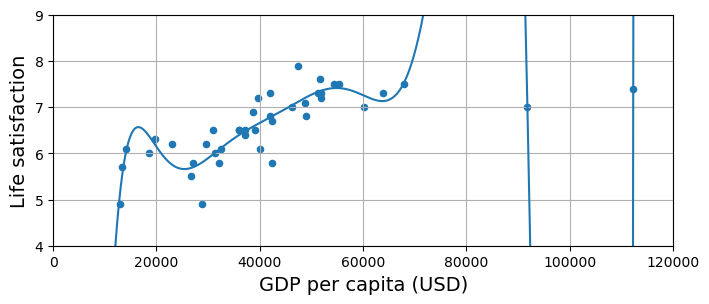

In [36]:
full_country_stats.plot(kind="scatter", x=gdp_col, y=lifesat_col,
                        figsize=(8, 3), grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg = LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ("poly", poly),
    ("scaler", scaler),
    ("lin_reg", lin_reg)
])
pipeline_reg.fit(X_full, y_full)
curve = pipeline_reg.predict(X)

plt.plot(X, curve)
plt.axis([0, 120_000, 4, 9])
plt.show()

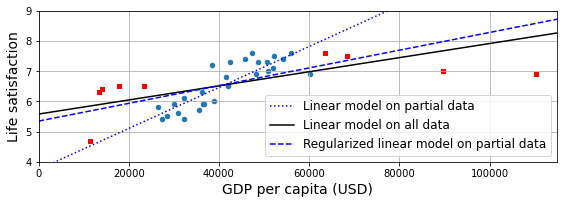

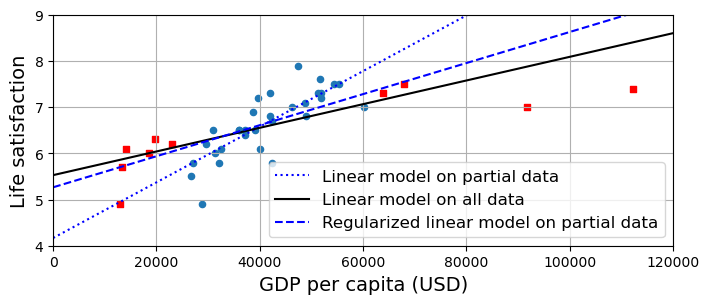

In [37]:
country_stats.plot(kind="scatter", x=gdp_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind="scatter", x=gdp_col, y=lifesat_col,
                  color="r", marker="s", grid=True, ax=plt.gca())

X = np.linspace(0, 120_000, 1000).reshape(-1, 1)
plt.plot(X, lin1.predict(X), "b:", label="Linear model on partial data")
plt.plot(X, lin2.predict(X), "k-", label="Linear model on all data")

# Since there's noise, avoid overfitting by setting very high regularization value
ridge = Ridge(alpha=10**9.3)
X_sample = country_stats[[gdp_col]].values
y_sample = country_stats[[lifesat_col]].values
ridge.fit(X_sample, y_sample)
plt.plot(X, ridge.predict(X), "b--",
         label="Regularized linear model on partial data")

plt.axis([0, 120_000, 4, 9])
plt.legend(loc="lower right")
plt.show()

## Exercise Solutions:

<details>
<summary>1. How would you define machine learning?</summary>

- Machine Learning is about building (computer) systems that can learn from data, without explicitly writing all rules or programming. Learning means getting better at some task, given some performance measure.
</details>
<br>

<details>
<summary>2. Can you name four types of applications where it shines?</summary>

- Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).

    - Writing by voice (text to speech)
    - Smart cameras (object detection, recognition)
    - Recommendation systems (personalized suggestions)
    - Chatbots (natural language understanding)
    - Self-driving cars (computer vision)
</details>
<br>

<details>
<summary>3. What is a labeled training set?</summary>

- A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance. Labels are the *answers* of a problem/task according to the data.
</details>
<br>

<details>
<summary>4. What are the two most common supervised tasks?</summary>

- Regression - predicting precise number, e.g. price, weather, etc.
- Classification - classifying into the certain classes, e.g. yes or no, multilabel classification.
</details>
<br>

<details>
<summary>5. Can you name four common unsupervised tasks?</summary>

- Clustering
- Dimensionality reduction
- Visualization
- Association rule learning
</details>
<br>

<details>
<summary>
6. What type of algorithm would you use to allow a robot to walk in various unknown terrains?
</summary>

- Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains, since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semi-supervised learning problem, but it would be less natural.
</details>
<br>

<details>
<summary>
7. What type of algorithm would you use to segment your customers into multiple groups?
</summary>

- If you don't know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.
</details>
<br>

<details>
<summary>
8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?
</summary>

- Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their labels (spam or not spam).
</details>
<br>

<details>
<summary>9. What is an online learning system?</summary>

- An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.
</details>
<br>

<details>
<summary>10. What is out-of-core learning?</summary>

- Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.
</details>
<br>

<details>
<summary>
11. What type of algorithm relies on a similarity measure to make predictions?
</summary>

- An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.
</details>
<br>

<details>
<summary>12. What is the difference between a model parameter and a model hyperparameter?</summary>

- A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).
</details>
<br>

<details>
<summary>
13. What do model-based algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?
</summary>

- Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance's features into the model's prediction function, using the parameter values found by the learning algorithm.
</details>
<br>

<details>
<summary>
14. Can you name four of the main challenges in machine learning?
</summary>

- Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.
</details>
<br>

<details>
<summary>
15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?
</summary>

- If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise (outliers) in the training data.
</details>
<br>

<details>
<summary>16. What is a test set, and why would you want to use it?</summary>

- A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.
</details>
<br>

<details>
<summary>17. What is the purpose of a validation set?</summary>

- A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.
</details>
<br>

<details>
<summary>
18. What is the train-dev set, when do you need it, and how do you use it?
</summary>

- The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that's held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.
</details>
<br>

<details>
<summary>
19. What can go wrong if you tune hyperparameters using the test set?
</summary>

- If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).
</details>